# Домашняя работа kaggle. Классификация

## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import linregress
from catboost import CatBoostRegressor
from pandas_profiling import ProfileReport
import optuna
plt.style.use('ggplot')
#to be continued...

%matplotlib inline

In [2]:
RANDOM_STATE = 42

## Загрузим и посмотрим на данные

In [3]:
train_df = pd.read_csv("pass_satisfaction_train.csv")
test_df = pd.read_csv("pass_satisfaction_test.csv")

In [4]:
train_df.sample(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
36421,81211,1,Loyal Customer,44,Business travel,Business,1426,3,3,3,...,4,4,4,4,4,4,4,15,12.0,satisfied
34836,71536,0,Loyal Customer,49,Business travel,Business,2080,1,1,1,...,4,4,5,4,4,4,5,0,0.0,satisfied
7513,91539,1,disloyal Customer,30,Business travel,Business,680,2,2,2,...,1,3,4,5,5,5,1,0,0.0,neutral or dissatisfied
58529,79244,0,Loyal Customer,53,Business travel,Business,1598,3,4,4,...,3,3,3,3,3,3,1,0,0.0,neutral or dissatisfied
22633,25683,1,Loyal Customer,27,Business travel,Business,3455,4,4,2,...,4,4,3,5,5,5,4,9,0.0,satisfied
20652,80382,1,Loyal Customer,40,Business travel,Eco,368,3,3,3,...,3,3,2,4,4,3,3,22,11.0,neutral or dissatisfied
64378,5216,1,Loyal Customer,50,Business travel,Business,383,3,3,3,...,4,4,4,4,5,4,4,0,0.0,satisfied
33225,839,0,Loyal Customer,45,Business travel,Business,2708,2,5,5,...,2,2,3,2,2,2,1,4,0.0,neutral or dissatisfied
48197,122234,1,Loyal Customer,51,Business travel,Eco,541,2,3,3,...,2,3,1,3,2,2,2,6,14.0,neutral or dissatisfied
35330,128949,1,Loyal Customer,49,Business travel,Business,2879,4,4,4,...,5,5,5,5,4,5,3,0,0.0,satisfied


In [5]:
test_df.sample(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
10742,129512,1,Loyal Customer,19,Personal Travel,Eco,1744,1,0,1,...,1,1,2,3,4,2,4,1,1,0.0
958,98337,0,disloyal Customer,38,Business travel,Business,1189,1,1,1,...,3,3,5,5,5,3,5,3,3,0.0
7260,70988,1,Loyal Customer,49,Business travel,Business,3977,5,3,5,...,5,4,4,4,4,3,4,5,62,57.0
7241,10140,1,Loyal Customer,14,Business travel,Business,1201,2,2,2,...,4,4,4,2,5,4,5,4,5,1.0
10396,59211,0,Loyal Customer,67,Personal Travel,Eco,1440,1,4,1,...,4,5,5,1,5,5,5,4,1,3.0
4095,121657,1,Loyal Customer,53,Business travel,Business,328,0,0,0,...,4,5,5,5,5,3,5,4,0,0.0
18172,61137,1,Loyal Customer,42,Business travel,Business,2522,2,2,2,...,4,4,4,4,4,5,4,4,17,0.0
1936,80753,1,Loyal Customer,15,Personal Travel,Eco,393,3,1,3,...,3,3,4,3,3,3,3,3,0,0.0
5241,43111,0,Loyal Customer,66,Personal Travel,Eco,391,1,4,1,...,2,1,1,1,1,5,1,2,0,0.0
14284,54531,1,Loyal Customer,26,Personal Travel,Eco,925,3,3,3,...,5,5,1,5,3,2,3,5,15,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  int64  
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  int64  
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

In [8]:
cat_cols = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
]

num_cols = [
    'Age',
    'Flight Distance',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

target_col = 'satisfaction'

Имеем пропуски только в колонке ```Arrival Delay in Minutes```

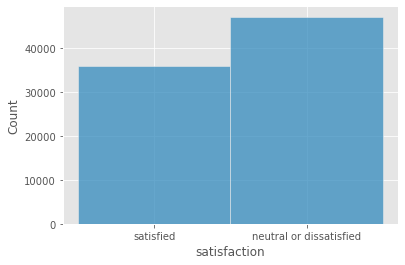

In [9]:
sns.histplot(data=train_df["satisfaction"]);

In [10]:
train_df.describe()

,id,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,82884.000000
mean,64930.846781,0.493618,39.391420,1191.039075,2.731482,3.063364,2.757600,2.978562,3.204444,3.249269,3.440696,3.360249,3.384743,3.350396,3.633639,3.301697,3.640557,3.288043,14.862649,15.224615
std,37471.448587,0.499962,15.122123,997.746525,1.326623,1.523716,1.397703,1.277557,1.329996,1.349614,1.317695,1.333022,1.287541,1.314807,1.179680,1.265153,1.174397,1.312261,38.037275,38.551625
min,1.000000,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32582.000000,0.000000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64810.000000,0.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97417.500000,1.000000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,1.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [11]:
train_df.drop(columns='id', inplace=True)

In [12]:
test_df.drop(columns='id', inplace=True)

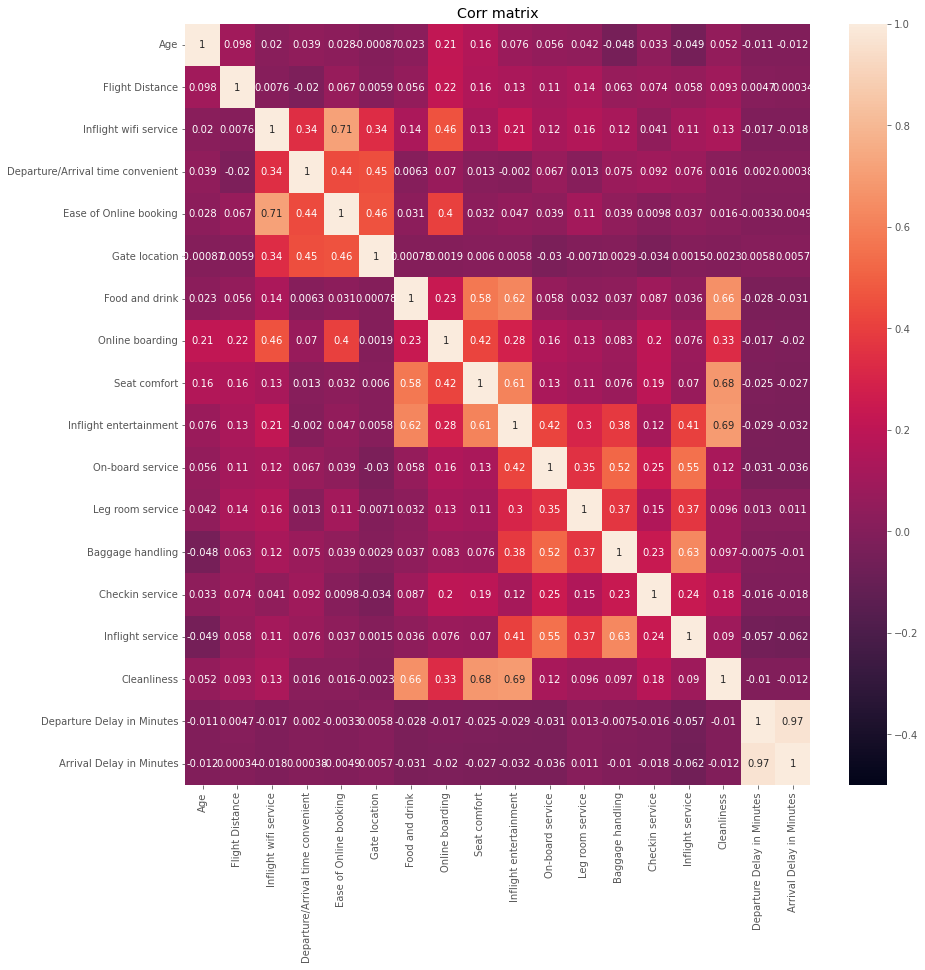

In [49]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(train_df[num_cols].corr(), annot=True, vmin=-0.5, vmax=1,)
plt.title("Corr matrix");

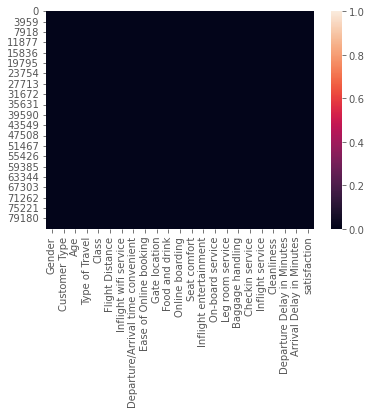

In [14]:
sns.heatmap(train_df.isna());

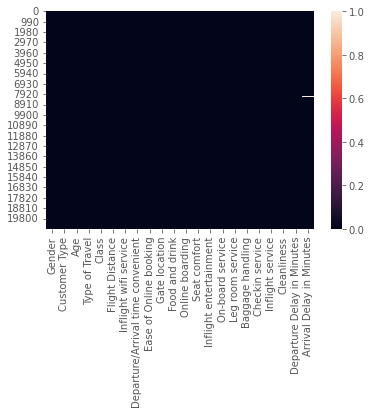

In [15]:
sns.heatmap(test_df.isna());

### Анализ ```Arrival Delay in Minutes```

0.9647764597120316


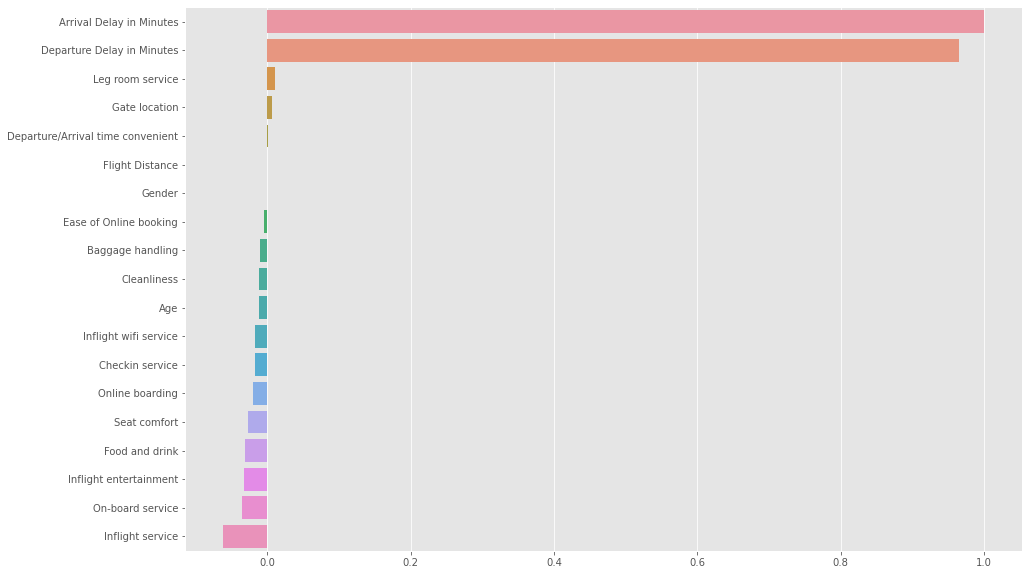

In [16]:
correlations = train_df.corrwith(train_df["Arrival Delay in Minutes"]).sort_values(ascending=False)
print(correlations["Departure Delay in Minutes"])

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

0.9682018817470212


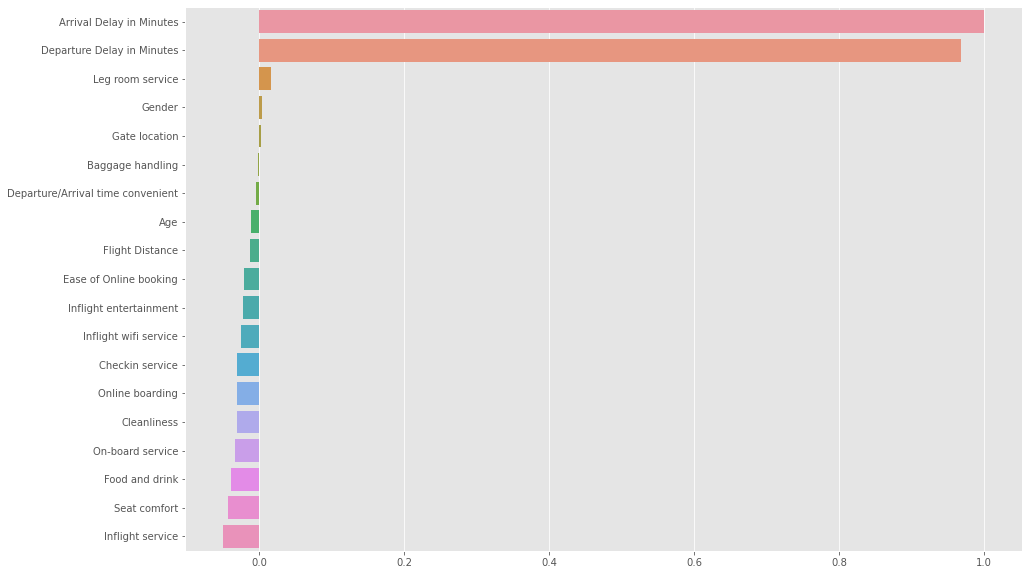

In [17]:
correlations = test_df.corrwith(test_df["Arrival Delay in Minutes"]).sort_values(ascending=False)
print(correlations["Departure Delay in Minutes"])


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Видим, что ```Arrival Delay in Minutes``` практически линейно зависит от ```Departure Delay in Minutes```

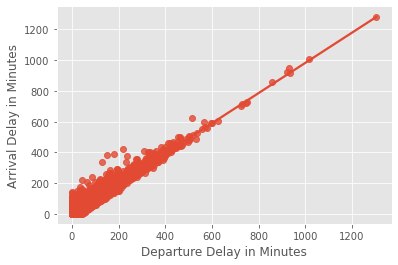

In [18]:
sns.regplot(data=train_df, x='Departure Delay in Minutes', y='Arrival Delay in Minutes');

In [19]:
train_df1 = train_df.dropna().copy()
slope, intercept, r_value, p_value, std_err = linregress(
    x=train_df1["Departure Delay in Minutes"],
    y=train_df1["Arrival Delay in Minutes"]
)

print(slope, intercept, r_value, p_value, std_err)

0.9813192860193382 0.7107532310860005 0.9647764597120316 0.0 0.0009294512161690581


In [20]:
def LinregImputer(x):
    return slope * x + intercept

train_df['Arrival Delay in Minutes'].fillna(LinregImputer(train_df['Departure Delay in Minutes']), inplace=True)
test_df['Arrival Delay in Minutes'].fillna(LinregImputer(test_df['Departure Delay in Minutes']), inplace=True)

## Обучение модели

In [21]:
cat_processing = [
    ('ohk_encoder', OneHotEncoder(handle_unknown='ignore')),
]

num_processing = [
    ('scaler', PowerTransformer())
]

cat_transformer = Pipeline(cat_processing)
num_transformer = Pipeline(num_processing)

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
])

model = linear_model.LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

learner = Pipeline([
    ('prep', preprocessor),
    ('model', model),
])

In [22]:
X = train_df.drop(target_col, axis=1)
y = train_df[target_col]

In [23]:
cv_outp = model_selection.cross_validate(learner, X, y, cv=20, scoring='f1_macro')
scores = cv_outp['test_score']

In [24]:
scores.mean()

0.8757247189964152

In [25]:
learner.fit(X, y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohk_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [26]:
pred = learner.predict(test_df)
test_df1 = pd.read_csv("pass_satisfaction_test.csv")
submission = pd.DataFrame({'id': test_df1['id'], 'satisfaction': pred})
submission.head()

,id,satisfaction
0,40853,neutral or dissatisfied
1,15070,satisfied
2,104309,neutral or dissatisfied
3,36427,neutral or dissatisfied
4,7630,satisfied


In [27]:
submission.to_csv("submission_w_o_tunning.csv", index=False)

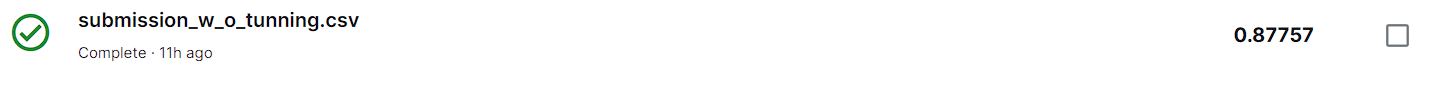

### Подбор гиперпараметров

Гиперматаметры для подбора:
- ```penalty``` (l1, l2, elasticnet)
-```C``` float

In [28]:
# def objective(trial):
    
#     logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
#     penalty = trial.suggest_categorical("penalty", ['l1', 'l2'])
    
#     model = linear_model.LogisticRegression(
#         max_iter=1000, 
#         random_state=RANDOM_STATE,
#         C=logreg_c,
#         penalty=penalty,
#         solver='liblinear',
#     )

#     learner = Pipeline([
#         ('prep', preprocessor),
#         ('model', model),
#     ])
    
#     score = model_selection.cross_val_score(
#         learner,
#         X,
#         y,
#         n_jobs=-1,
#         cv=3,
#         scoring='f1_macro',
#     )
    
#     f1_score = score.mean()
#     return f1_score

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [30]:
# print(f"Best score: {study.best_value}")
# print(f"Best params: {study.best_params}")

In [31]:
model = linear_model.LogisticRegression(
    max_iter=1000, 
    random_state=RANDOM_STATE,
    C=0.8757699342457457,
    penalty='l2',
)

learner = Pipeline([
    ('prep', preprocessor),
    ('model', model),
])

learner.fit(X, y)

pred = learner.predict(test_df)
test_df1 = pd.read_csv("pass_satisfaction_test.csv")
submission = pd.DataFrame({'id': test_df1['id'], 'satisfaction': pred})
submission.to_csv("submission_tunning.csv", index=False)

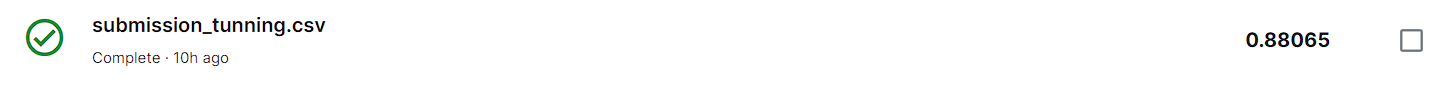

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
model = MLPClassifier(
    activation='logistic',
    solver='lbfgs',
    max_iter=3000,
    random_state=RANDOM_STATE,
)

learner = Pipeline([
    ('prep', preprocessor),
    ('model', model),
])

In [34]:
cv_outp = model_selection.cross_validate(learner, X, y, cv=3, scoring='f1_macro', n_jobs=-1)
scores = cv_outp['test_score']

In [38]:
scores.mean()

0.9389979142565359

In [35]:
learner.fit(X, y)

C:\Users\victus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohk_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('model',
                 MLPClassifier(activation='logistic', max_iter=3000,
                               solver='lbfgs'))])

In [36]:
learner

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohk_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('model',
                 MLPClassifier(activation='logistic', max_iter=3000,
                               solver='lbfgs'))])

In [37]:
pred = learner.predict(test_df)
test_df1 = pd.read_csv("pass_satisfaction_test.csv")
submission = pd.DataFrame({'id': test_df1['id'], 'satisfaction': pred})
submission.to_csv("submission_perceptron.csv", index=False)

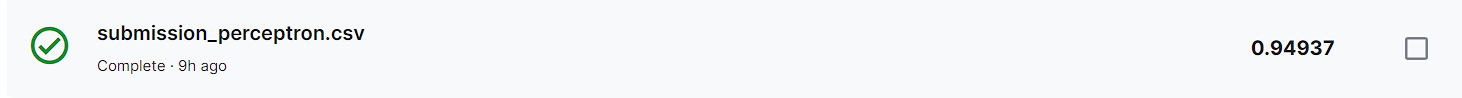